## 1 Introduction 

The dataset encompasses consumer reviews from Amazon products, ranging from Kindle to Fire TV Stick, sourced from Datafiniti's Product Database. Through sentiment analysis, I delved into key aspects such as text preprocessing, feature extraction, sentiment classification, and model comparison to derive valuable insights. 

The dataset found from the Kaggle and its source is https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products 

### Attributes 

0   id - Consumer id number                     
1   name  - Product Name                  
2   asins - A ten-digit alphanumeric code that identifies products on Amazon   
3   brand - Type of Amazon Product brand                 
4   categories - Product Categories           
5   keys -                 
6   manufacturer - Manufacturer of the product          
7   reviews.date - Date of review records           
8   reviews.dateAdded -      
9   reviews.dateSeen - The date when the reviews checked and seen     
10  reviews.didPurchase - Did you purchase the comment product?   
11  reviews.doRecommend - Do you recommend the product?    
12  reviews.id - Review unique id           
13  reviews.numHelpful   
14  reviews.rating (Target Variable) - Rating of the products    
15  reviews.sourceURLs - Reviews Source Website    
16  reviews.text - Description of reviews         
17  reviews.title  - Reviews title       
18  reviews.userCity - User City     
19  reviews.userProvince - User Province 
20  reviews.username - Username 

## 2 Necessary Libraries & Modules

In [51]:
#import sys  
#!{sys.executable} -m pip install contractions
#!{sys.executable} -m pip install pandas_profiling

In [52]:
#pip install wordcloud

In [1]:
import nltk
#nltk.download('stopwords')

In [2]:
# Data Manipulation 
import pandas as pd 
import numpy as np # linear algebra
import math 

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Text Preprocessing 
import contractions # Contraction
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize # Tokenization
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer # lemmatization
from bs4 import BeautifulSoup as bs # remove html tag
import unidecode #remove accented word

import warnings
warnings.filterwarnings('ignore') # hides warning 
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
sns.set_style('whitegrid') # Plotting style
%matplotlib inline
np.random.seed(7) 

In [3]:
#!pip install prettytable

In [4]:
# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score

# Machine learning
from sklearn.naive_bayes import MultinomialNB #NaiveBayes
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.svm import SVC #SVC
from sklearn.ensemble import RandomForestClassifier #Random Forest
 
from sklearn.model_selection import GridSearchCV #Grid Search SVC

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
from sklearn import metrics
from prettytable import PrettyTable

## 3 Data Importation 

In [5]:
df = pd.read_csv(r"C:\Users\TzeShuan\OneDrive\Documents\LinkedIn Learning\Data Analysis Reports\Amazon Product Sentiment Analysis\1429_1.csv")
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


## 4 Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [6]:
# copy the set of data, so that the original dataset would not altered 
data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [7]:
data['asins'].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

### Missing values Imputation

In [9]:
# Check for Null values
def summary(df):
    summary_data = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_data['missing_num'] = df.isna().sum()
    summary_data['missing_%'] = ((df.isna().sum())/len(df)) *100
    summary_data['unique'] = df.nunique().values
    summary_data['count'] = df.count().values
    return summary_data

summary(data).style.background_gradient(cmap='Purples')

,dtypes,missing_num,missing_%,unique,count
id,object,0,0.000000,42,34660
name,object,6760,19.503751,48,27900
asins,object,2,0.005770,41,34658
brand,object,0,0.000000,6,34660
categories,object,0,0.000000,41,34660
keys,object,0,0.000000,42,34660
manufacturer,object,0,0.000000,2,34660
reviews.date,object,39,0.112522,1078,34621
reviews.dateAdded,object,10621,30.643393,1941,24039
reviews.dateSeen,object,0,0.000000,3911,34660


In [8]:
# drop the columns 'reviews.didPurchase', 'reviews.id', 'reviews.userCity', 'reviews.userProvince'

columns_to_exclude = ['reviews.didPurchase', 'reviews.id', 'reviews.userCity', 'reviews.userProvince']
data1 = data.drop(columns=columns_to_exclude)
data1.columns
data1.shape

(34660, 17)

In [9]:
# Replace NA to 0 
data1.fillna(0, inplace= True)

# recheck for Null Values 
for col in data1.columns:
    print(col, data1[col].isnull().sum())

id 0
name 0
asins 0
brand 0
categories 0
keys 0
manufacturer 0
reviews.date 0
reviews.dateAdded 0
reviews.dateSeen 0
reviews.doRecommend 0
reviews.numHelpful 0
reviews.rating 0
reviews.sourceURLs 0
reviews.text 0
reviews.title 0
reviews.username 0


## 5 Data Exploration 

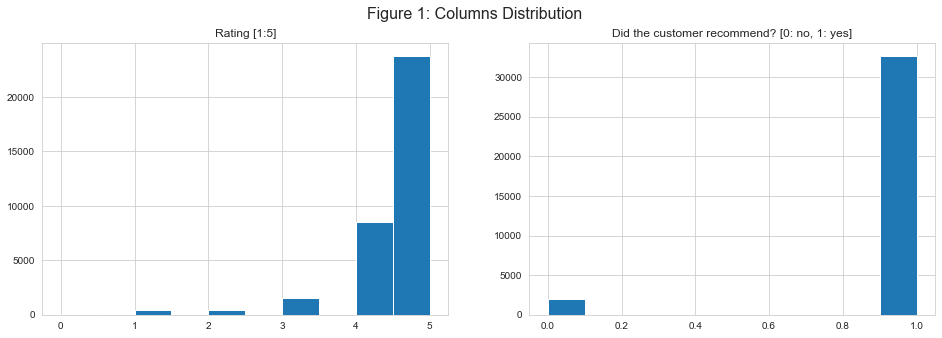

In [12]:
fig1, (ax11, ax12,) = plt.subplots(1,2, figsize = (16,5))
fig1.suptitle('Figure 1: Columns Distribution', fontsize = 16)

ax11.hist(data1['reviews.rating']);
ax11.set_title('Rating [1:5]');

ax12.hist(data1['reviews.doRecommend'].astype(float));
ax12.set_title('Did the customer recommend? [0: no, 1: yes]');


Generally, it shows that majority of the reviews are satisfied with the products and recommend to others. 

### Distribution of sentiment (ratings)

In [13]:
# create two new columns to classify the reviews into negative and positing ratings
sentiment_score = {1 : 0,
                   2 : 0,
                   3 : 0,
                   4 : 1,
                   5 : 1}

sentiment = {0 : 'NEGATIVE',
             1 : 'POSITIVE'}

# mapping
data1['sentiment_score'] = data1['reviews.rating'].map(sentiment_score)
data1['sentiment'] = data1['sentiment_score'].map(sentiment)
data1.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sentiment_score,sentiment
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter,1.0,POSITIVE
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman,1.0,POSITIVE
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,1.0,POSITIVE
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,1.0,POSITIVE
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,1.0,POSITIVE


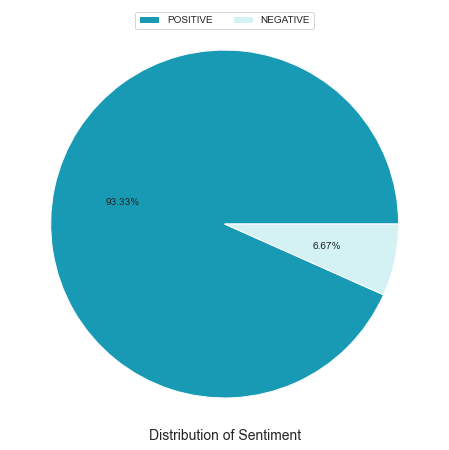

In [14]:
# Pie Chart 
plt.figure(figsize = (8, 8))

labels=['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data1['sentiment'].value_counts(), autopct='%0.2f%%', colors=colors)

plt.title('Distribution of Sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9) #loc=9 is legend placement in the graph 
plt.show()

In [15]:
data1['reviews.rating'].mean()

4.580207732256203

The overall rating is 4.58 which is approach to very satisfied rating. 

### Reviews.rating vs Reviews.doRecommend vs  Product

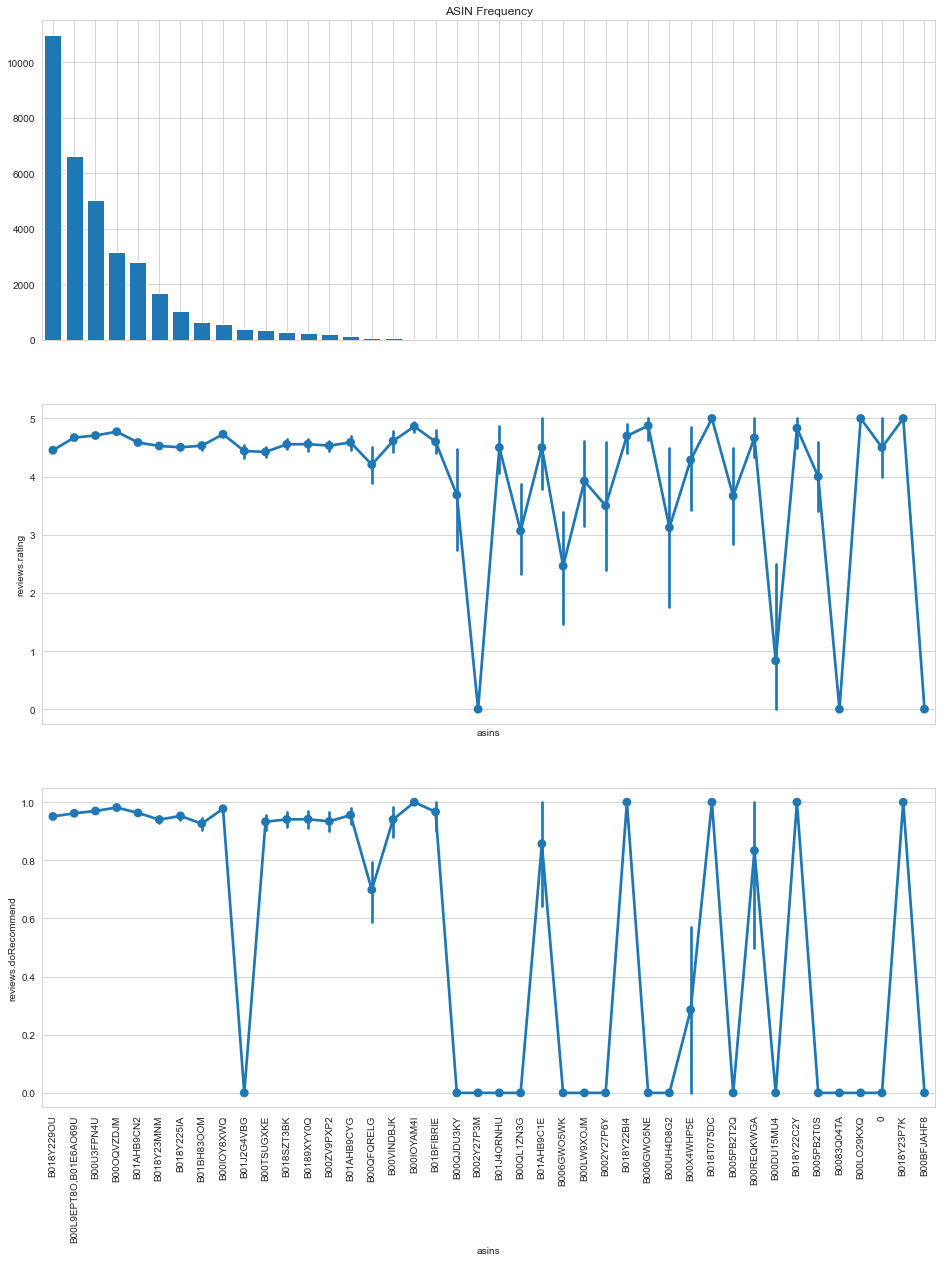

In [16]:
# Convert 'asins' column to strings
data1['asins'] = data1['asins'].astype(str)

asins_count_ix = data1["asins"].value_counts().index

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 20), sharex=True)

# First barplot (hide x-axis labels)
axes[0].bar(data1['asins'].value_counts().index, data1['asins'].value_counts())
axes[0].set_title("ASIN Frequency")

# Second pointplot (hide x-axis labels)
sns.pointplot(x='asins', y='reviews.rating', order=asins_count_ix, data=data1, ax=axes[1])

# Third pointplot (show x-axis labels)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=data1, ax=axes[2])

# Set x-axis labels for the third subplot
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

# Display the plots
plt.show()


###  Top 10 ASINS and Rating 

In [17]:
counts = data1['asins'].value_counts().to_frame()
avg_rating = data1.groupby('asins')['reviews.rating'].mean().to_frame()
table = counts.join(avg_rating)

top_10 = table.sort_values(by=['asins','reviews.rating'], ascending=[False, False]).head(10)
print(top_10)

                       asins  reviews.rating
B018Y229OU             10966        4.454222
B00L9EPT8O,B01E6AO69U   6619        4.671098
B00U3FPN4U              5056        4.707278
B00OQVZDJM              3176        4.772355
B01AHB9CN2              2814        4.586709
B018Y23MNM              1685        4.527003
B018Y225IA              1038        4.504817
B01BH83OOM               636        4.531447
B00IOY8XWQ               580        4.729310
B01J2G4VBG               402        4.440299


## 6 Text Preprocessing 

In [62]:
data2 = data1[['reviews.text', 'reviews.rating']]

# Define the Target Variable
def sentiments(rating): 
    if (rating == 5) or (rating == 4): 
        return "Positive"
    elif rating == 3: 
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"

data2['reviews.rating'] = data2['reviews.rating'].apply(sentiments)
data2.shape

(34660, 2)

In [63]:
data2.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,Positive
1,great for beginner or experienced person. Boug...,Positive
2,Inexpensive tablet for him to use and learn on...,Positive
3,I've had my Fire HD 8 two weeks now and I love...,Positive
4,I bought this for my grand daughter when she c...,Positive


In [64]:
data2['reviews.text'][0]

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.'

## 6.1 Text Cleaning

### Remove Contractions

In [65]:
# Remove Contractions: words that are shortened

data2['reviews.text'] = data2['reviews.text'].astype(str)
data2['reviews.text'] = data2['reviews.text'].apply(lambda x: [contractions.fix(word)
                                                               for word in x.split()])

# text is converted to list and list has been joined back into string 
data2['reviews.text'] = [' '.join(map(str, l)) for l in data2['reviews.text']]


In [66]:
data2['reviews.text'][0]

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.'

### Removal of html tag 

In [67]:
def strip_html_tags(text):
    soup = bs(text, 'html.parser')
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

In [68]:
temp_list = []
for rows in data2['reviews.text']:
    temp_list.append(strip_html_tags(rows))
data2['reviews.text'] = temp_list

In [69]:
data2['reviews.text'][0]

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.'

### Removal of Accented Characters 

In [70]:
def remove_accented_chars(text):
    text = unidecode.unidecode(text)
    return text

In [71]:
temp_list = []
for rows in data2['reviews.text']:
    temp_list.append(remove_accented_chars(rows))
data2['reviews.text'] = temp_list

In [72]:
data2['reviews.text'][0]

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.'

### Removal of Numbers

In [73]:
data2['reviews.text'] = data2['reviews.text'].str.replace('\d','')

In [74]:
data2['reviews.text'][0]

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.'

### Tokenization

Tokenization is the process of breaking a text into individual units called tokens. Tokenization helps to understand the structure of the text by breaking it down into smaller units. It allows you to analyze and process the text in a more manageable way.Once you have tokens, you can easily apply operations like stemming, lemmatization, or removing stop words to clean and normalize the text.

In [75]:
# Download the Punkt tokenizer models
#nltk.download('punkt')

In [76]:
data2['reviews.text'] = data2['reviews.text'].apply(word_tokenize)

In [77]:
data2['reviews.text']

0        [This, product, so, far, has, not, disappointe...
1        [great, for, beginner, or, experienced, person...
2        [Inexpensive, tablet, for, him, to, use, and, ...
3        [I, have, had, my, Fire, HD, two, weeks, now, ...
4        [I, bought, this, for, my, grand, daughter, wh...
                               ...                        
34655    [This, is, not, appreciably, faster, than, any...
34656    [Amazon, should, include, this, charger, with,...
34657    [Love, my, Kindle, Fire, but, I, am, really, d...
34658    [I, was, surprised, to, find, it, did, not, co...
34659    [to, spite, the, fact, that, i, have, nothing,...
Name: reviews.text, Length: 34660, dtype: object

### Part-of-Speech Tagging 

Each token is assigned a grammatical category (noun, verb, etc.) It is required to first tag each word with parts of speech, before carry out lemmatization (convert a word to root word). The Averaged Perceptron Tagger in NLTK is a statistical part-of-speech (POS) tagger that uses a machine learning algorithm called Averaged Perceptron

In [78]:
#import nltk
#nltk.download('averaged_perceptron_tagger')
#from nltk import pos_tag

# Apply pos_tag directly to the 'reviews_clean' column
data2['reviews.text'] = data2['reviews.text'].apply(pos_tag)

In [79]:
data2['reviews.text'][:5]

0    [(This, DT), (product, NN), (so, RB), (far, RB...
1    [(great, JJ), (for, IN), (beginner, NN), (or, ...
2    [(Inexpensive, JJ), (tablet, NN), (for, IN), (...
3    [(I, PRP), (have, VBP), (had, VBN), (my, PRP$)...
4    [(I, PRP), (bought, VBD), (this, DT), (for, IN...
Name: reviews.text, dtype: object

### Lemmatization 

Lemmatize: changing word tokens to root words. This helps in reducing inflected words to a common base form, making it easier to analyze and understand the text.

In [80]:
#nltk.download('wordnet')

In [81]:
lemmatizer = WordNetLemmatizer()
data2['reviews.text'] = data2['reviews.text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word, _ in x))

### Normalizing, Removal of Punctuation, Stopwords, Rare Words

In [82]:

def text_preprocessing(df, var): 
    
    # Normalizing Case Folding - Uppercase to Lowercase 
    df[var] = df[var].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
    
    # Removing Punctuation 
    df[var] = df[var].str.replace('[^\w\s]','')
    
    # StopWords
    sw = stopwords.words('english')
    df[var] = df[var].apply(lambda x: ' '.join(x for x in x.split() if x not in sw))
    
    # Remove Rare Words
    temp_df = pd.Series(' '.join(df[var]).split()).value_counts()
    drops = temp_df[temp_df <= 1].index
    df[var] = df[var].apply(lambda x: ' '.join(x for x in str(x).split() if x not in drops))
    
    return df


In [83]:
data2 = text_preprocessing(data2, "reviews.text")

In [84]:
data2.head()

,reviews.text,reviews.rating
0,product far ha disappointed child love use lik...,Positive
1,great beginner experienced person bought gift ...,Positive
2,inexpensive tablet use learn step nabi wa thri...,Positive
3,fire hd two week love tablet great prime membe...,Positive
4,bought grand daughter come visit set user ente...,Positive


### Text Visualization  

In [85]:
#!pip install --upgrade pip

#!pip install --upgrade Pillow

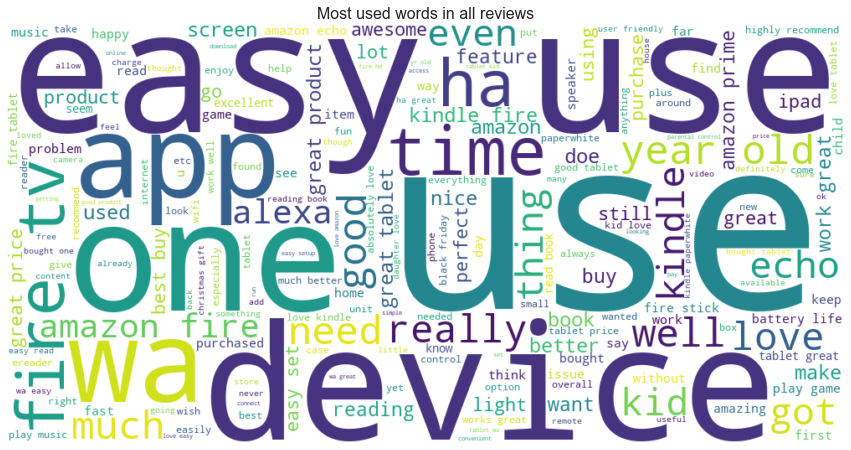

In [86]:
# Convert the 'reviews_clean' column to strings
data2['reviews.text'] = data2['reviews.text'].astype(str)

# Concatenate all cleaned reviews into a single string
all_words = ' '.join(data2['reviews.text'])

# Generate the WordCloud without specifying an external font
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_words)

# Display the WordCloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most used words in all reviews', size=16)
plt.axis('off')
plt.show()


## Sentiment Analysis  

### Train-Test Split

In [111]:
X = data2['reviews.text']
y= data2['reviews.rating']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)
print(len(X_train), len(X_test))

27728 6932


### Distribution of Sentiment

<function matplotlib.pyplot.show(close=None, block=None)>

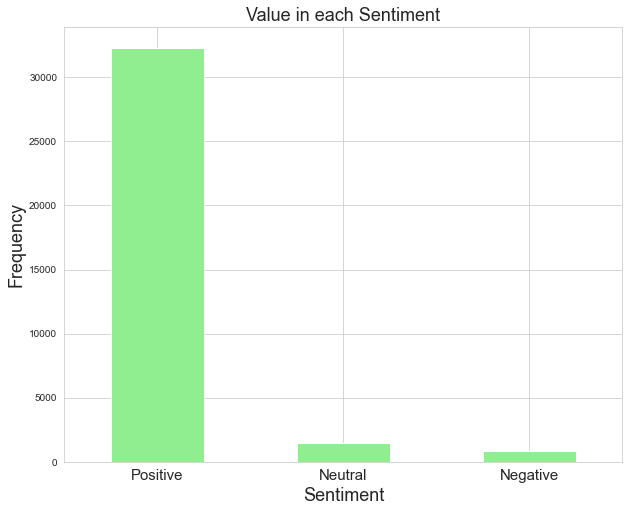

In [112]:
plt.figure(figsize = (10, 8))
y.value_counts().plot(kind='bar', color='lightgreen')
plt.title("Value in each Sentiment", fontsize = 18)
plt.xticks(rotation = 0 , fontsize = 15)
plt.xlabel('Sentiment', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.show

In [116]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
y_train = y_train.fillna(' ')
y_test = y_test.fillna(' ')

### TF-IDF Vectorization 

Converting text data into a numerical format that machine learning models can understand. The 'CountVectorizer' using is part of the vectorization step. It represents the text data as a matrix of word counts, where each row corresponds to a document, and each column corresponds to a unique word in the entire dataset.

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(27728, 6839)

The TfidfTransformer in scikit-learn is used to transform a count matrix (produced by CountVectorizer or a similar method) into a term-frequency or term-frequency times inverse document-frequency (TF or TF-IDF) representation.

Setting use_idf to False means that you are only considering term frequencies (TF) and not incorporating the inverse document frequency (IDF) into the transformation. The IDF is a measure of how important a term is across a collection of documents.

In [118]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf

<27728x6839 sparse matrix of type '<class 'numpy.float64'>'
	with 383008 stored elements in Compressed Sparse Row format>

### Multinomial Naive Bayes

In [119]:
# vectorization is carried out in the form of pipeline (CountVectorizer and TfidfTransformer) for each machine learning technique
# the previous code is just a sample for review
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()),
                            ("tfidf", TfidfTransformer()),
                            ("clf_nomialNB", MultinomialNB())])

# Fit the pipeline on the training data
clf_multiNB_pipe.fit(X_train, y_train)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nomialNB', MultinomialNB())])

In [142]:
# Prediction
predictedMultiNB_train = clf_multiNB_pipe.predict(X_train)
predictedMultiNB_test= clf_multiNB_pipe.predict(X_test)

# Accuracy
train_accuracy_MultiNB = accuracy_score(y_train, predictedMultiNB_train)
test_accuracy_MultiNB = accuracy_score(y_test, predictedMultiNB_test)
print("Training Accuracy:", train_accuracy_MultiNB)
print("Testing Accuracy:", test_accuracy_MultiNB)

Training Accuracy: 0.9317296595499135
Testing Accuracy: 0.9347951529140219


In [143]:
reportMultiNB = classification_report(y_test, predictedMultiNB_test)
print(reportMultiNB)

              precision    recall  f1-score   support

                   0.00      0.00      0.00         7
    Negative       0.00      0.00      0.00       153
     Neutral       0.00      0.00      0.00       290
    Positive       0.94      1.00      0.97      6482

    accuracy                           0.93      6932
   macro avg       0.23      0.25      0.24      6932
weighted avg       0.87      0.93      0.90      6932



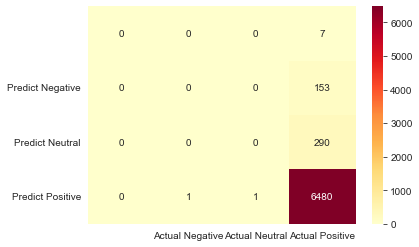

In [144]:
cmMultiNB = confusion_matrix(y_test, predictedMultiNB_test)
cmMultiNB_matrix = pd.DataFrame(data=cmMultiNB, columns=[' ', 'Actual Negative', 'Actual Neutral', 'Actual Positive'], index=[' ', 'Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cmMultiNB_matrix, annot=True, fmt='d', cmap='YlOrRd')
plt.show()

### Logistic Regression Clssifier

In [126]:
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()),
                            ("tfidf", TfidfTransformer()),
                            ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, y_train)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_logReg', LogisticRegression())])

In [139]:
# Prediction 
predictedLogReg_train = clf_logReg_pipe.predict(X_train)
predictedLogReg_test= clf_logReg_pipe.predict(X_test)

# Accuracy
train_accuracy_LogReg = accuracy_score(y_train, predictedLogReg_train)
test_accuracy_LogReg = accuracy_score(y_test, predictedLogReg_test)
print("Training Accuracy:", train_accuracy_LogReg)
print("Testing Accuracy:", test_accuracy_LogReg)

Training Accuracy: 0.941106462781304
Testing Accuracy: 0.9365262550490479


In [140]:
reportLogReg = classification_report(y_test, predictedLogReg_test)
print(reportLogReg)

              precision    recall  f1-score   support

                   0.00      0.00      0.00         7
    Negative       0.71      0.11      0.19       153
     Neutral       0.32      0.04      0.08       290
    Positive       0.94      1.00      0.97      6482

    accuracy                           0.94      6932
   macro avg       0.49      0.29      0.31      6932
weighted avg       0.91      0.94      0.91      6932



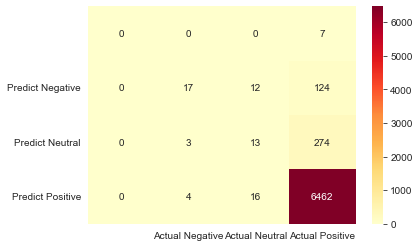

In [141]:
cmLogReg = confusion_matrix(y_test, predictedLogReg_test)
cmLogReg_matrix = pd.DataFrame(data=cmLogReg, columns=[' ', 'Actual Negative', 'Actual Neutral', 'Actual Positive'], index=[' ', 'Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cmLogReg_matrix, annot=True, fmt='d', cmap='YlOrRd')
plt.show()

### Support Vector Machine Classifier

In [131]:
clf_SVC_pipe = Pipeline([("vect", CountVectorizer()),
                            ("tfidf", TfidfTransformer()),
                            ("clf_SVC", SVC())])
clf_SVC_pipe.fit(X_train, y_train)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_SVC', SVC())])

In [134]:
# Prediction 
predictedSVC_train = clf_SVC_pipe.predict(X_train)
predictedSVC_test= clf_SVC_pipe.predict(X_test)

# Accuracy
train_accuracy_SVC = accuracy_score(y_train, predictedSVC_train)
test_accuracy_SVC = accuracy_score(y_test, predictedSVC_test)
print("Training Accuracy:", train_accuracy_SVC)
print("Testing Accuracy:", test_accuracy_SVC )

Training Accuracy: 0.9500865551067513
Testing Accuracy: 0.9353721869590306


In [136]:
reportSVC = classification_report(y_test, predictedSVC_test)
print(reportSVC)

              precision    recall  f1-score   support

                   0.00      0.00      0.00         7
    Negative       0.75      0.02      0.04       153
     Neutral       0.00      0.00      0.00       290
    Positive       0.94      1.00      0.97      6482

    accuracy                           0.94      6932
   macro avg       0.42      0.25      0.25      6932
weighted avg       0.89      0.94      0.90      6932



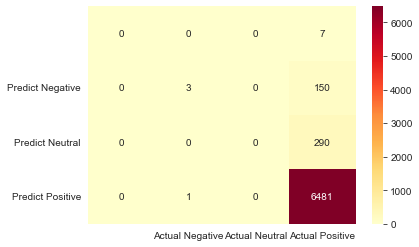

In [138]:
cmSVC = confusion_matrix(y_test, predictedSVC_test)
cmSVC_matrix = pd.DataFrame(data=cmSVC, columns=[' ', 'Actual Negative', 'Actual Neutral', 'Actual Positive'], index=[' ', 'Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cmSVC_matrix, annot=True, fmt='d', cmap='YlOrRd')
plt.show()

## Model Comparison 

In [145]:
Summary = PrettyTable(['Model Name', 'Accuracy in %'])
Summary.add_row(['Multinomial Naive Bayes', '{:.2f}'.format(test_accuracy_MultiNB*100)])
Summary.add_row(['Logistic Regression Classifier', '{:.2f}'.format(test_accuracy_LogReg*100)])
Summary.add_row(['Support Vector Machine Classifier', '{:.2f}'.format(test_accuracy_SVC*100)])

print(Summary)

+-----------------------------------+---------------+
|             Model Name            | Accuracy in % |
+-----------------------------------+---------------+
|      Multinomial Naive Bayes      |     93.48     |
|   Logistic Regression Classifier  |     93.65     |
| Support Vector Machine Classifier |     93.54     |
+-----------------------------------+---------------+
